# Tensorflow probability

In [1]:
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter('ignore', RuntimeWarning)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
data = fetch_california_housing()

In [6]:
import tensorflow as tf

In [7]:
%%capture
import tensorflow_probability as tfp
tfd = tfp.distributions

## Tensorflow proability

### Distributions

In [8]:
[str(x).split('.')[-1][:-2] for x in tfd.distribution.Distribution.__subclasses__()]

['Autoregressive',
 'BatchReshape',
 'Bates',
 'Bernoulli',
 'Beta',
 'Gamma',
 'Binomial',
 'BetaBinomial',
 'JointDistribution',
 'JointDistribution',
 '_Cast',
 'Blockwise',
 'Categorical',
 'Cauchy',
 'Chi2',
 'TransformedDistribution',
 'LKJ',
 'CholeskyLKJ',
 'ContinuousBernoulli',
 '_BaseDeterministic',
 '_BaseDeterministic',
 'Dirichlet',
 'Multinomial',
 'DirichletMultinomial',
 'DoublesidedMaxwell',
 'Empirical',
 'FiniteDiscrete',
 'GammaGamma',
 'Normal',
 'Sample',
 'GaussianProcess',
 'GeneralizedNormal',
 'GeneralizedPareto',
 'Geometric',
 'Uniform',
 'HalfCauchy',
 'HalfNormal',
 'StudentT',
 'HalfStudentT',
 'HiddenMarkovModel',
 'Horseshoe',
 'Independent',
 'InverseGamma',
 'InverseGaussian',
 'Laplace',
 'LinearGaussianStateSpaceModel',
 'Logistic',
 'Mixture',
 'MixtureSameFamily',
 'MultivariateStudentTLinearOperator',
 'NegativeBinomial',
 'OneHotCategorical',
 'OrderedLogistic',
 'Pareto',
 'PERT',
 'QuantizedDistribution',
 'Poisson',
 '_TensorCoercible',
 'Pi

In [9]:
dist = tfd.Normal(loc=100, scale=15)

In [10]:
x = dist.sample((3,4))
x

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[ 83.29852 ,  95.15665 ,  79.39106 ,  96.15728 ],
       [ 98.41527 ,  92.12249 ,  84.8345  , 108.53681 ],
       [103.09979 , 106.0009  , 101.560646, 121.4366  ]], dtype=float32)>

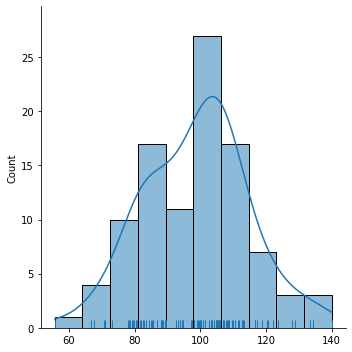

In [11]:
n = 100
xs = dist.sample(n)
sns.displot(xs.numpy(), kde=True, rug=True)
pass

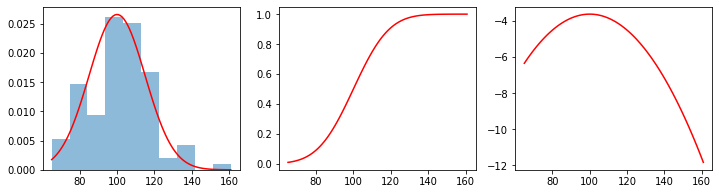

In [12]:
n = 100
xs = dist.sample(n).numpy()
xp = np.linspace(xs.min(), xs.max(), 100)

fig, axes = plt.subplots(1,3,figsize=(12,3))
axes[0].hist(xs, density=True, alpha=0.5)
axes[0].plot(xp, dist.prob(xp), c='r')
axes[1].plot(xp, dist.cdf(xp), c='r')
axes[2].plot(xp, dist.log_prob(xp), c='r')
pass

### Broadcasting

In [13]:
dist = tfd.Normal(loc=[3,4,5,6], scale=0.5)

In [14]:
dist.sample(5)

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[3.5586948, 3.9348307, 5.0899396, 5.783105 ],
       [3.067632 , 4.1513247, 4.612622 , 5.8868527],
       [2.59842  , 4.4720488, 5.3526335, 6.121451 ],
       [3.4130564, 4.2862325, 4.882853 , 6.7559376],
       [3.281401 , 3.9321692, 5.0865593, 5.9378805]], dtype=float32)>

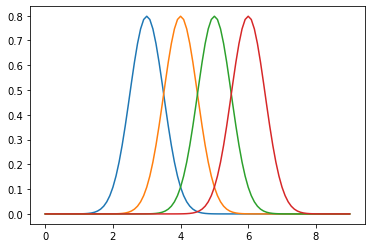

In [15]:
xp = tf.linspace(0., 9., 100)[:, tf.newaxis]
plt.plot(np.tile(xp, dist.batch_shape), dist.prob(xp))
pass

### Mixtures

In [16]:
gmm = tfd.MixtureSameFamily(
    mixture_distribution=tfd.Categorical(
        probs=[0.4, 0.1, 0.2, 0.3]
    ),
    components_distribution=tfd.Normal(
      loc=[3., 4., 5., 6.],      
      scale=[0.1, 0.5, 0.5, .1])
)

In [17]:
n = 10000
xs = gmm.sample(n)

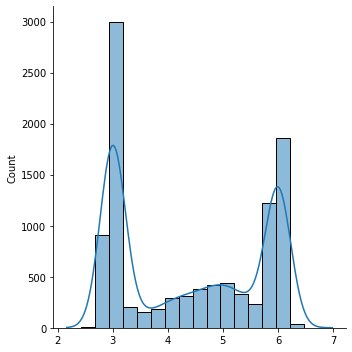

In [18]:
sns.displot(xs, kde=True)
pass

### Transformations (Bijectors)

A bijection is a one-to-one and onto function. It is so named because bijections have inverses - that is, you can use a bijection to transform from one space to another. We will see more of this in the normalizing flows notebook.

In [19]:
[x for x in dir(tfp.bijectors) if x[0].isupper()]

['AbsoluteValue',
 'Affine',
 'AffineLinearOperator',
 'AffineScalar',
 'AutoregressiveNetwork',
 'BatchNormalization',
 'Bijector',
 'Blockwise',
 'Chain',
 'CholeskyOuterProduct',
 'CholeskyToInvCholesky',
 'CorrelationCholesky',
 'Cumsum',
 'DiscreteCosineTransform',
 'Exp',
 'Expm1',
 'FFJORD',
 'FillScaleTriL',
 'FillTriangular',
 'FrechetCDF',
 'GeneralizedExtremeValueCDF',
 'GeneralizedPareto',
 'GompertzCDF',
 'GumbelCDF',
 'Identity',
 'Inline',
 'Invert',
 'IteratedSigmoidCentered',
 'KumaraswamyCDF',
 'LambertWTail',
 'Log',
 'Log1p',
 'MaskedAutoregressiveFlow',
 'MatrixInverseTriL',
 'MatvecLU',
 'MoyalCDF',
 'NormalCDF',
 'Ordered',
 'Pad',
 'Permute',
 'PowerTransform',
 'RationalQuadraticSpline',
 'RealNVP',
 'Reciprocal',
 'Reshape',
 'Scale',
 'ScaleMatvecDiag',
 'ScaleMatvecLU',
 'ScaleMatvecLinearOperator',
 'ScaleMatvecTriL',
 'ScaleTriL',
 'Shift',
 'ShiftedGompertzCDF',
 'Sigmoid',
 'Sinh',
 'SinhArcsinh',
 'SoftClip',
 'Softfloor',
 'SoftmaxCentered',
 'Softplus

In [20]:
lognormal = tfp.bijectors.Exp()(tfd.Normal(0, 0.5))

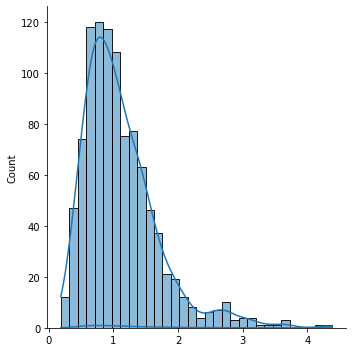

In [21]:
xs = lognormal.sample(1000)
sns.displot(xs, kde=True)
xp = np.linspace(tf.reduce_min(xs), tf.reduce_max(xs), 100)
plt.plot(xp, tfd.LogNormal(loc=0, scale=0.5).prob(xp))
pass

## Regression

In [22]:
xs = tf.Variable([0., 1., 2., 5., 6., 8.])
ys = tf.sin(xs) + tfd.Normal(loc=0, scale=0.5).sample(xs.shape[0])

In [23]:
xs.shape, ys.shape

(TensorShape([6]), TensorShape([6]))

In [24]:
xs.numpy()

array([0., 1., 2., 5., 6., 8.], dtype=float32)

In [25]:
ys.numpy()

array([-0.32956275,  0.437029  ,  1.0411185 , -1.1218498 ,  0.6463779 ,
        2.0801036 ], dtype=float32)

#### Generate data

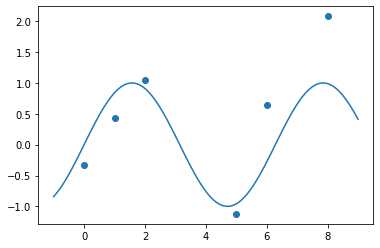

In [26]:
xp = tf.linspace(-1., 9., 100)[:, None]
plt.scatter(xs.numpy(), ys.numpy())
plt.plot(xp, tf.sin(xp))
pass

#### Fit curve with Gaussian process

In [27]:
kernel = tfp.math.psd_kernels.ExponentiatedQuadratic(length_scale=1.5)
reg = tfd.GaussianProcessRegressionModel(
    kernel, xp[:, tf.newaxis], xs[:, tf.newaxis], ys
)

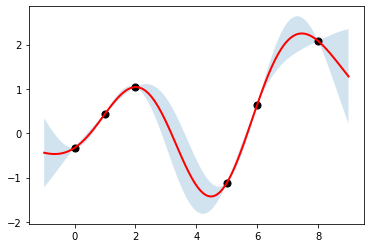

In [28]:
ub, lb = reg.mean() + [2*reg.stddev(), -2*reg.stddev()]
plt.fill_between(np.ravel(xp), np.ravel(ub), np.ravel(lb), alpha=0.2)
plt.plot(xp, reg.mean(), c='red', linewidth=2)
plt.scatter(xs[:], ys[:], s=50, c='k')
pass

### Modeling

Although we will not do much with this, you can do MCMC with `tfp`. Here we just show an example from the official docs of sampling from a normal distribution using HMC (prior predictive samples).

In [29]:
[x for x in dir(tfp.mcmc) if x[0].isupper()]

['CheckpointableStatesAndTrace',
 'DualAveragingStepSizeAdaptation',
 'HamiltonianMonteCarlo',
 'MetropolisAdjustedLangevinAlgorithm',
 'MetropolisHastings',
 'NoUTurnSampler',
 'RandomWalkMetropolis',
 'ReplicaExchangeMC',
 'SimpleStepSizeAdaptation',
 'SliceSampler',
 'StatesAndTrace',
 'TransformedTransitionKernel',
 'TransitionKernel',
 'UncalibratedHamiltonianMonteCarlo',
 'UncalibratedLangevin',
 'UncalibratedRandomWalk']

In [30]:
dir(tfp.vi)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_allowed_symbols',
 'amari_alpha',
 'arithmetic_geometric',
 'chi_square',
 'csiszar_vimco',
 'dual_csiszar_function',
 'fit_surrogate_posterior',
 'jeffreys',
 'jensen_shannon',
 'kl_forward',
 'kl_reverse',
 'log1p_abs',
 'modified_gan',
 'monte_carlo_variational_loss',
 'mutual_information',
 'pearson',
 'squared_hellinger',
 'symmetrized_csiszar_function',
 't_power',
 'total_variation',
 'triangular']

In [49]:
# From example in help docs

def unnormalized_log_prob(x):
    return -x - x**2.
 
# Initialize the HMC transition kernel.
num_results = int(1e2)
num_burnin_steps = int(1e2)
adaptive_hmc = tfp.mcmc.SimpleStepSizeAdaptation(
    tfp.mcmc.HamiltonianMonteCarlo(
        target_log_prob_fn=unnormalized_log_prob,
        num_leapfrog_steps=3,
        step_size=1.),
    num_adaptation_steps=int(num_burnin_steps * 0.8))
 
# Run the chain (with warm-up).
samples, is_accepted = tfp.mcmc.sample_chain(
    num_results=num_results,
    num_burnin_steps=num_burnin_steps,
    current_state=1.,
    kernel=adaptive_hmc,
    trace_fn=lambda _, pkr: pkr.inner_results.is_accepted)
 
sample_mean = tf.reduce_mean(samples)
sample_stddev = tf.math.reduce_std(samples)

In [32]:
sample_mean.numpy()

-0.61960775

In [33]:
sample_stddev.numpy()

0.6109558

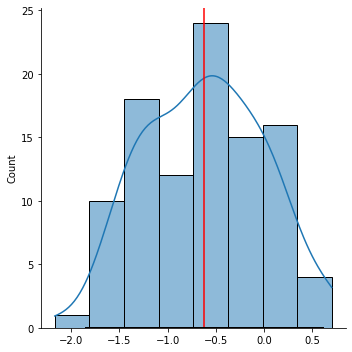

In [34]:
sns.displot(samples, kde=True)
plt.axvline(sample_mean.numpy(), c='red')
plt.plot([sample_mean - 2*sample_stddev, sample_mean + 2*sample_stddev], 
         [0.01, 0.01], c='k', linewidth=3)
pass

### DistributionLambda

`DistributionLambda` links `kears` with `tfp` distributions, allowing the output of neural net to be a distribution rather than a tensor as a layer.

In [41]:
x = np.linspace(-5, 5, 100)
y = 3*x + 2 + 3*np.random.normal(0, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [42]:
def nll(x, dist):
    """Negative log likelilhood."""
    
    return -dist.log_prob(x)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tfp.layers.DistributionLambda(
      lambda t: tfd.Normal(loc=t, scale=1)),
])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.05), 
              loss=nll)
hist = model.fit(x_train, y_train, epochs=500, verbose=0)

#### Evaluate confidence intervals by sampling

In [43]:
yhat = model(x_test)

In [44]:
runs = 200
y_pred = yhat.sample(runs)

In [45]:
μ = y_pred.numpy().mean(axis=0).squeeze()
σ = y_pred.numpy().std(axis=0).squeeze()

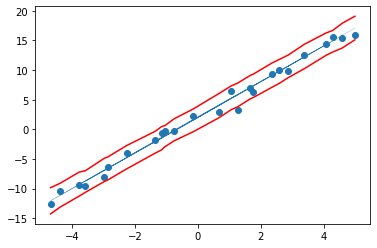

In [48]:
plt.scatter(x_test, yhat.sample())
plt.plot(x_test, μ, lw=0.2)
idx = np.argsort(x_test)
plt.plot(x_test[idx], μ[idx] + 2*σ[idx], c='r')
plt.plot(x_test[idx], μ[idx] - 2*σ[idx], c='r')
pass